In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show

In [25]:
import time

In [4]:
def generate_duration(k=4, mu=1, size=1):
    return np.random.gamma(k, mu, size)

In [188]:
dist = generate_duration(36, 5/6, 1000)

/Users/fanggot/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


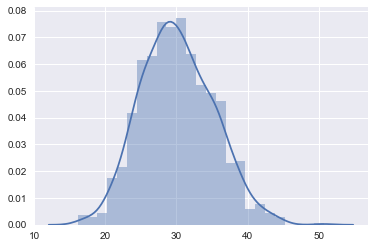

In [189]:
sns.distplot(dist)

1796.3396874537405 315.50966464959123


/Users/fanggot/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


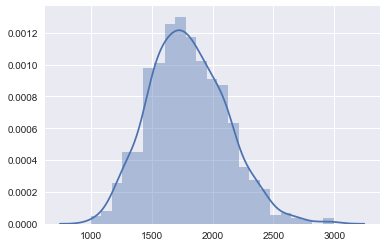

In [190]:
dist = generate_duration(36, 50, 1000)
print(np.mean(dist), np.std(dist))
sns.distplot(dist)

14.990934099990794 15.114299216254954


/Users/fanggot/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


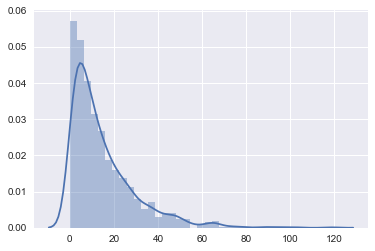

In [191]:
test_dist = np.random.exponential(15,1000)
print(np.mean(test_dist), np.std(test_dist))
sns.distplot(test_dist)

In [56]:
def generate_table_data(k, mu, theta, total_time):
    prev_end = 0
    a_1 = np.random.exponential(theta)
#     print('1st starting: ', a_1)
    last_start = a_1
    result = []
    while last_start < total_time:
        result.append(last_start)
        s_1 = generate_duration(k, mu)[0]
        result.append(last_start + s_1)
        a_2 = np.random.exponential(theta)
        last_start += max(s_1, a_2)
#         print('dining time is ', s_1)
#         print('next customer arrive after ', a_2)
    return result

In [68]:
generate_table_data(36,5/6,15,180)

[1.1439491050113921,
 28.379969522963663,
 46.59588463777816,
 79.38860335139847,
 79.38860335139847,
 107.30469704154913,
 109.80590494134168,
 142.23211839648445,
 165.07974212792016,
 191.15110993301673]

In [69]:
generate_table_data(36,5/6,15,180)[::2]

[22.118009444929267,
 49.991616528410646,
 83.89337024458798,
 115.55053557418435,
 159.61664396079422]

In [70]:
def generate_tables(k, mu, theta, total_time, num_tables):
    return [generate_table_data(k,mu,theta,total_time) for i in range(num_tables)]

In [75]:
generate_tables(36,5/6,15,180, 10)

[[0.6786540213087043,
  31.733838155741072,
  31.733838155741072,
  60.6864359167666,
  60.6864359167666,
  87.02084432125983,
  87.02084432125983,
  127.0837015834665,
  127.0837015834665,
  157.78229185696264,
  157.78229185696264,
  194.89570376859194],
 [19.85742945625198,
  49.918789079954884,
  49.918789079954884,
  93.78932974644191,
  93.78932974644191,
  130.19115404830225,
  130.19115404830225,
  162.18481166090777,
  162.18481166090777,
  188.72999296008277],
 [15.96709983745096,
  47.79747170862781,
  47.79747170862781,
  80.40876187946333,
  120.81722128198524,
  157.93620164267838,
  157.93620164267838,
  193.3200218377826],
 [4.555945145574583,
  34.242813832077275,
  34.242813832077275,
  61.86952452861759,
  67.10877770189802,
  100.24253141700405,
  100.24253141700405,
  134.0998128495496,
  134.0998128495496,
  168.4084352093923,
  168.4084352093923,
  194.04974975459737],
 [2.720785589418919,
  27.66109875273272,
  27.66109875273272,
  53.60337743491773,
  53.603377

In [78]:
df = pd.DataFrame(generate_tables(36,5/6,15,120, 10))

In [79]:
df

0          1          2           3           4           5  \
0  21.434683  57.877319  57.877319   87.483706         NaN         NaN   
1   1.630141  31.930314  31.930314   77.162778   77.162778  111.754778   
2  37.750693  66.305376  66.305376   91.644358   91.644358  124.665229   
3  10.805745  31.444735  31.444735   66.208773   66.208773   92.817401   
4   4.566716  41.873682  41.873682   65.112754   65.112754  100.501171   
5  42.147065  78.845921  78.845921  106.585541  106.585541  130.275062   
6   5.808758  44.143525  44.143525   75.006565   75.006565  111.562674   
7  32.006562  62.803775  62.803775   94.335013   94.335013  129.728684   
8  19.305043  45.598023  45.598023   69.878245   69.878245   95.609710   
9  21.205985  50.430640  86.293599  113.306946  113.306946  144.727679   

            6           7  
0         NaN         NaN  
1  111.754778  134.911299  
2         NaN         NaN  
3   92.817401  130.008475  
4  100.501171  120.907572  
5         NaN         NaN  
6  111.562674  140.967091  
7         NaN         NaN  
8   95.609710  125.687984  
9         NaN         NaN

In [96]:
size = {1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 4, 7: 4, 8: 4, 9: 6, 10: 6, 11: 6, 12: 6}

In [117]:
size = [2,2,2,2,4,4,4,4,6,6,6,6]

In [333]:
spend_avg = [19.97,13.15,11.40,10.60,9.34,10.10]

In [340]:
spending_std = [10.28,4.80,3.96,3.60,3.26,3.05]

In [342]:
def generate_table_data_triple(k, mu, theta, total_time, table_index, size, avg_spending, std_spending, date_time):
    prev_end = 0
    a_1 = np.random.exponential(theta)
#     print('1st starting: ', a_1)
    last_start = a_1
    result = []
    while last_start < total_time:
#         result.append(last_start)
        s_1 = generate_duration(k, mu)[0]
        table_size = size[table_index]
        party_size = np.random.choice(range(1,table_size+1), p=prob_party[:table_size]/np.sum(prob_party[:table_size]))
        spending_total = np.random.normal(avg_spending[party_size-1], std_spending[party_size-1])*party_size
        result.append((table_index+1, table_size, party_size, date_time+last_start, date_time+last_start + s_1, spending_total))
#         result.append(last_start + s_1)
        a_2 = np.random.exponential(theta)
        last_start += max(s_1, a_2)
#         print('dining time is ', s_1)
#         print('next customer arrive after ', a_2)
    return result

In [343]:
def generate_tables_triple(k, mu, theta, total_time, size, avg_spending, std_spending, date_time):
    result = []
#     for table_index in size.keys():
    for table_index, table_size in enumerate(size):
        result += generate_table_data_triple(k, mu, theta, total_time, table_index, size, avg_spending, std_spending, date_time)
    return result

In [344]:
generate_tables_triple(36,5/6,15,180, size, spend_avg, spending_std, 1538377200.0)

[(1, 2, 2, 1538377207.3783116, 1538377239.4962087, 6.203680710321009),
 (1, 2, 1, 1538377239.4962087, 1538377270.6984966, 28.87399103055906),
 (1, 2, 2, 1538377294.2529697, 1538377319.845567, 32.21499476137544),
 (1, 2, 2, 1538377330.1963394, 1538377366.30321, 34.727091611360336),
 (1, 2, 2, 1538377366.3032103, 1538377404.844619, 34.197872119213905),
 (2, 2, 1, 1538377226.2521124, 1538377264.5641148, 16.05966849848025),
 (2, 2, 2, 1538377264.5641148, 1538377296.4289248, 3.6348365793320703),
 (2, 2, 2, 1538377296.428925, 1538377331.23553, 21.937495177880148),
 (2, 2, 2, 1538377331.23553, 1538377353.5709848, 27.322451324776466),
 (2, 2, 1, 1538377360.9147701, 1538377395.3455637, 32.31473158336682),
 (3, 2, 2, 1538377242.5310528, 1538377270.5418298, 5.541230096240881),
 (3, 2, 1, 1538377270.5418298, 1538377303.6003373, 13.348450345257742),
 (3, 2, 2, 1538377303.6003373, 1538377327.8553824, 26.847445502162113),
 (3, 2, 2, 1538377327.8553824, 1538377358.3084145, 42.18479951788345),
 (3, 2, 

In [345]:
df = pd.DataFrame(generate_tables_triple(36,5/6,15,1800, size, spend_avg, spending_std, 1538377200.0), columns=['table_index', 'table_size', 'party_size', 'enter_time', 'leaving_time', 'bill_amount'])
df

table_index  table_size  party_size    enter_time  leaving_time  \
0              1           2           2  1.538377e+09  1.538377e+09   
1              1           2           1  1.538377e+09  1.538377e+09   
2              1           2           2  1.538377e+09  1.538377e+09   
3              1           2           2  1.538377e+09  1.538377e+09   
4              1           2           2  1.538377e+09  1.538377e+09   
5              1           2           2  1.538377e+09  1.538377e+09   
6              1           2           1  1.538377e+09  1.538377e+09   
7              1           2           2  1.538377e+09  1.538378e+09   
8              1           2           2  1.538378e+09  1.538378e+09   
9              1           2           1  1.538378e+09  1.538378e+09   
10             1           2           2  1.538378e+09  1.538378e+09   
11             1           2           2  1.538378e+09  1.538378e+09   
12             1           2           2  1.538378e+09  1.538378e+09   
13             1           2           2  1.538378e+09  1.538378e+09   
14             1           2           2  1.538378e+09  1.538378e+09   
15             1           2           1  1.538378e+09  1.538378e+09   
16             1           2           2  1.538378e+09  1.538378e+09   
17             1           2           1  1.538378e+09  1.538378e+09   
18             1           2           2  1.538378e+09  1.538378e+09   
19             1           2           2  1.538378e+09  1.538378e+09   
20             1           2           2  1.538378e+09  1.538378e+09   
21             1           2           2  1.538378e+09  1.538378e+09   
22             1           2           2  1.538378e+09  1.538378e+09   
23             1           2           2  1.538378e+09  1.538378e+09   
24             1           2           2  1.538378e+09  1.538378e+09   
25             1           2           2  1.538378e+09  1.538378e+09   
26             1           2           2  1.538378e+09  1.538378e+09   
27             1           2           2  1.538378e+09  1.538378e+09   
28             1           2           2  1.538378e+09  1.538378e+09   
29             1           2           1  1.538378e+09  1.538378e+09   
..           ...         ...         ...           ...           ...   
630           12           6           3  1.538378e+09  1.538378e+09   
631           12           6           1  1.538378e+09  1.538378e+09   
632           12           6           2  1.538378e+09  1.538378e+09   
633           12           6           3  1.538378e+09  1.538378e+09   
634           12           6           3  1.538378e+09  1.538378e+09   
635           12           6           4  1.538378e+09  1.538378e+09   
636           12           6           4  1.538378e+09  1.538378e+09   
637           12           6           1  1.538378e+09  1.538378e+09   
638           12           6           1  1.538378e+09  1.538378e+09   
639           12           6           2  1.538378e+09  1.538378e+09   
640           12           6           2  1.538378e+09  1.538378e+09   
641           12           6           4  1.538378e+09  1.538378e+09   
642           12           6           4  1.538378e+09  1.538378e+09   
643           12           6           3  1.538378e+09  1.538378e+09   
644           12           6           4  1.538378e+09  1.538379e+09   
645           12           6           3  1.538379e+09  1.538379e+09   
646           12           6           2  1.538379e+09  1.538379e+09   
647           12           6           2  1.538379e+09  1.538379e+09   
648           12           6           2  1.538379e+09  1.538379e+09   
649           12           6           2  1.538379e+09  1.538379e+09   
650           12           6           3  1.538379e+09  1.538379e+09   
651           12           6           2  1.538379e+09  1.538379e+09   
652           12           6           6  1.538379e+09  1.538379e+09   
653           12           6           4  1.5

In [346]:
df['party_size'].value_counts()

2    327
1    127
3    104
4     92
5      6
6      4
Name: party_size, dtype: int64

/Users/fanggot/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


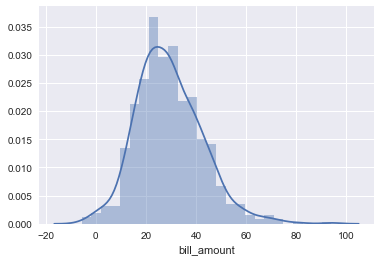

In [347]:
sns.distplot(df['bill_amount'])

In [217]:
df['party_size'].sum()

235

In [218]:
df['table_size'].sum()

272

/Users/fanggot/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


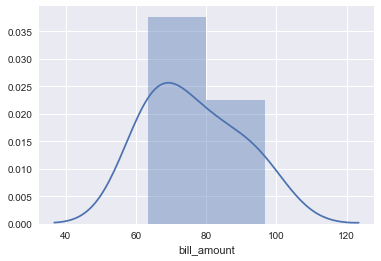

In [219]:
sns.distplot(df[df['party_size'] == 4]['bill_amount'])

In [222]:
df = pd.DataFrame(generate_tables_triple(36,50,15*60,180*60, size, 20, datetime.datetime(2018,10,1,18,0).timestamp()), columns=['table_index', 'table_size', 'party_size', 'enter_time', 'leaving_time', 'bill_amount'])
df

table_index  table_size  party_size    enter_time  leaving_time  \
0             1           2           2  1.538443e+09  1.538445e+09   
1             1           2           1  1.538445e+09  1.538447e+09   
2             1           2           1  1.538447e+09  1.538448e+09   
3             1           2           1  1.538448e+09  1.538450e+09   
4             1           2           1  1.538450e+09  1.538452e+09   
5             1           2           1  1.538452e+09  1.538453e+09   
6             2           2           2  1.538442e+09  1.538444e+09   
7             2           2           2  1.538444e+09  1.538446e+09   
8             2           2           2  1.538446e+09  1.538448e+09   
9             2           2           2  1.538448e+09  1.538449e+09   
10            2           2           1  1.538449e+09  1.538452e+09   
11            2           2           1  1.538452e+09  1.538453e+09   
12            3           2           1  1.538442e+09  1.538444e+09   
13            3           2           1  1.538444e+09  1.538446e+09   
14            3           2           2  1.538446e+09  1.538448e+09   
15            3           2           2  1.538448e+09  1.538450e+09   
16            3           2           2  1.538450e+09  1.538451e+09   
17            3           2           1  1.538451e+09  1.538453e+09   
18            4           2           1  1.538443e+09  1.538445e+09   
19            4           2           2  1.538445e+09  1.538447e+09   
20            4           2           1  1.538447e+09  1.538448e+09   
21            4           2           1  1.538449e+09  1.538450e+09   
22            4           2           1  1.538450e+09  1.538452e+09   
23            4           2           1  1.538452e+09  1.538454e+09   
24            5           4           3  1.538444e+09  1.538445e+09   
25            5           4           4  1.538445e+09  1.538447e+09   
26            5           4           3  1.538447e+09  1.538448e+09   
27            5           4           3  1.538448e+09  1.538451e+09   
28            5           4           4  1.538452e+09  1.538454e+09   
29            6           4           3  1.538443e+09  1.538444e+09   
..          ...         ...         ...           ...           ...   
38            7           4           4  1.538452e+09  1.538454e+09   
39            8           4           4  1.538442e+09  1.538444e+09   
40            8           4           4  1.538444e+09  1.538446e+09   
41            8           4           3  1.538446e+09  1.538448e+09   
42            8           4           3  1.538448e+09  1.538450e+09   
43            8           4           4  1.538451e+09  1.538453e+09   
44            9           6           5  1.538443e+09  1.538444e+09   
45            9           6           5  1.538446e+09  1.538448e+09   
46            9           6           5  1.538448e+09  1.538450e+09   
47            9           6           5  1.538450e+09  1.538451e+09   
48            9           6           6  1.538451e+09  1.538453e+09   
49            9           6           5  1.538453e+09  1.538454e+09   
50           10           6           6  1.538443e+09  1.538445e+09   
51           10           6           5  1.538445e+09  1.538446e+09   
52           10           6           6  1.538446e+09  1.538448e+09   
53           10           6           6  1.538449e+09  1.538450e+09   
54           10           6           6  1.538450e+09  1.538452e+09   
55           10           6           6  1.538452e+09  1.538453e+09   
56           11           6           5  1.538442e+09  1.538444e+09   
57           11           6           6  1.538444e+09  1.538446e+09   
58           11           6           5  1.538446e+09  1.538448e+09   
59           11           6           6  1.538448e+09  1.538449e+09   
60           11           6           6  1.538449e+09  1.538451e+09   
61           11           6           6  1.538451e+09  1.538453e+09   
62           12           6 

In [197]:
import datetime

In [199]:
datetime.datetime(2018,10,1,0,0).timestamp()

1538377200.0

In [204]:
datetime.datetime(2018,10,1,0,0) + datetime.timedelta(days=1)

datetime.datetime(2018, 10, 2, 0, 0)

In [349]:
datetime.datetime.fromtimestamp(1538377200.0)

datetime.datetime(2018, 10, 1, 0, 0)

In [223]:
df['enter_time'].apply(datetime.datetime.fromtimestamp)

0    2018-10-01 18:14:34.285351
1    2018-10-01 18:44:22.307205
2    2018-10-01 19:16:35.725503
3    2018-10-01 19:45:47.885410
4    2018-10-01 20:10:44.706605
5    2018-10-01 20:42:22.835076
6    2018-10-01 18:06:18.524998
7    2018-10-01 18:33:11.117264
8    2018-10-01 19:03:31.066642
9    2018-10-01 19:33:32.752284
10   2018-10-01 20:02:16.296657
11   2018-10-01 20:44:07.146058
12   2018-10-01 18:00:45.552189
13   2018-10-01 18:33:53.839858
14   2018-10-01 19:09:36.886311
15   2018-10-01 19:43:09.878554
16   2018-10-01 20:09:24.575416
17   2018-10-01 20:34:02.455886
18   2018-10-01 18:13:43.247156
19   2018-10-01 18:46:22.459108
20   2018-10-01 19:18:24.983405
21   2018-10-01 19:50:24.440193
22   2018-10-01 20:12:43.228703
23   2018-10-01 20:43:01.146272
24   2018-10-01 18:25:22.978848
25   2018-10-01 18:55:50.023712
26   2018-10-01 19:19:58.332225
27   2018-10-01 19:47:20.106101
28   2018-10-01 20:39:53.081092
29   2018-10-01 18:12:06.077502
                ...            
38   201

In [350]:
start_date = datetime.datetime(2018,10,1,18,0)
end_date = datetime.datetime(2018,12,31,18,0)

In [351]:
cur_date = start_date
result = []
while cur_date <= end_date:
    if cur_date.weekday() < 4:
        theta = 30
    else:
        theta = 15
    result += generate_tables_triple(36,50,theta*60,180*60, size, spend_avg, spending_std, cur_date.timestamp())
    cur_date += datetime.timedelta(days=1)

In [352]:
df_3m = pd.DataFrame(result, columns=['table_index', 'table_size', 'party_size', 'enter_time', 'leaving_time', 'bill_amount'])

In [353]:
df_3m['enter_time'].apply(datetime.datetime.fromtimestamp)

0      2018-10-01 18:36:26.069045
1      2018-10-01 19:12:14.870852
2      2018-10-01 19:42:25.751237
3      2018-10-01 20:22:59.201668
4      2018-10-01 20:52:05.576325
5      2018-10-01 19:01:42.300143
6      2018-10-01 19:27:00.070920
7      2018-10-01 20:42:20.652410
8      2018-10-01 18:21:36.092732
9      2018-10-01 19:06:08.048614
10     2018-10-01 19:39:02.578355
11     2018-10-01 20:45:34.673375
12     2018-10-01 19:00:49.778497
13     2018-10-01 19:31:39.700630
14     2018-10-01 19:57:41.531701
15     2018-10-01 18:00:09.257138
16     2018-10-01 18:39:26.713296
17     2018-10-01 19:11:24.256124
18     2018-10-01 19:55:38.945330
19     2018-10-01 20:43:52.008561
20     2018-10-01 18:18:05.617683
21     2018-10-01 18:46:37.944024
22     2018-10-01 19:20:20.600888
23     2018-10-01 19:57:24.603538
24     2018-10-01 20:27:53.489028
25     2018-10-01 18:02:20.444189
26     2018-10-01 18:35:57.292490
27     2018-10-01 19:17:40.294199
28     2018-10-01 19:53:52.749360
29     2018-10

In [354]:
df_3m.to_csv('simulated_restaurant_data.csv')

In [355]:
df_3m.head()

table_index  table_size  party_size    enter_time  leaving_time  \
0            1           2           2  1.538444e+09  1.538446e+09   
1            1           2           2  1.538446e+09  1.538448e+09   
2            1           2           2  1.538448e+09  1.538450e+09   
3            1           2           2  1.538451e+09  1.538452e+09   
4            1           2           2  1.538452e+09  1.538454e+09   

   bill_amount  
0    22.988835  
1    36.006953  
2    27.813938  
3    25.354997  
4    15.615397

In [248]:
df_3m[6168:]['bill_amount']

6168     35.285035
6169     21.248683
6170     18.480333
6171     24.264124
6172     25.901884
6173     21.528805
6174     22.246149
6175     21.153786
6176     24.479737
6177     19.466819
6178     20.458572
6179     24.030119
6180     15.015248
6181     21.406371
6182     16.215824
6183     43.965547
6184     23.450609
6185     17.909111
6186     47.396214
6187     24.756650
6188     44.616848
6189     45.169760
6190     31.022010
6191     56.944386
6192     82.606536
6193     72.824279
6194     95.539494
6195     66.553267
6196     76.822645
6197     53.791131
           ...    
6210     77.523907
6211     56.311150
6212     84.211417
6213     60.654135
6214    130.959156
6215    104.382264
6216    110.262365
6217     99.979200
6218    141.342114
6219    105.407230
6220     76.020819
6221     87.632951
6222    127.020236
6223     75.421617
6224     93.594166
6225    118.303342
6226    120.825093
6227     72.802915
6228     92.385172
6229    142.385922
6230    108.287498
6231    119.

In [249]:
df_3m[6168:]

table_index  table_size  party_size    enter_time  leaving_time  \
6168            1           2           2  1.546309e+09  1.546311e+09   
6169            1           2           1  1.546311e+09  1.546313e+09   
6170            1           2           1  1.546313e+09  1.546314e+09   
6171            1           2           1  1.546314e+09  1.546316e+09   
6172            1           2           1  1.546316e+09  1.546318e+09   
6173            1           2           1  1.546318e+09  1.546319e+09   
6174            2           2           1  1.546308e+09  1.546310e+09   
6175            2           2           1  1.546310e+09  1.546312e+09   
6176            2           2           1  1.546312e+09  1.546314e+09   
6177            2           2           1  1.546314e+09  1.546315e+09   
6178            2           2           1  1.546315e+09  1.546317e+09   
6179            2           2           1  1.546317e+09  1.546319e+09   
6180            3           2           1  1.546308e+09  1.546310e+09   
6181            3           2           1  1.546310e+09  1.546312e+09   
6182            3           2           1  1.546312e+09  1.546314e+09   
6183            3           2           2  1.546314e+09  1.546317e+09   
6184            3           2           1  1.546317e+09  1.546319e+09   
6185            4           2           1  1.546309e+09  1.546311e+09   
6186            4           2           2  1.546312e+09  1.546313e+09   
6187            4           2           1  1.546313e+09  1.546315e+09   
6188            4           2           2  1.546315e+09  1.546316e+09   
6189            4           2           2  1.546316e+09  1.546318e+09   
6190            4           2           2  1.546318e+09  1.546319e+09   
6191            5           4           3  1.546309e+09  1.546310e+09   
6192            5           4           4  1.546310e+09  1.546312e+09   
6193            5           4           3  1.546312e+09  1.546313e+09   
6194            5           4           4  1.546313e+09  1.546315e+09   
6195            5           4           3  1.546315e+09  1.546317e+09   
6196            5           4           4  1.546317e+09  1.546319e+09   
6197            5           4           3  1.546319e+09  1.546321e+09   
...           ...         ...         ...           ...           ...   
6210            8           4           4  1.546310e+09  1.546312e+09   
6211            8           4           4  1.546312e+09  1.546314e+09   
6212            8           4           4  1.546314e+09  1.546317e+09   
6213            8           4           4  1.546317e+09  1.546319e+09   
6214            9           6           6  1.546308e+09  1.546310e+09   
6215            9           6           5  1.546310e+09  1.546312e+09   
6216            9           6           5  1.546312e+09  1.546313e+09   
6217            9           6           6  1.546313e+09  1.546315e+09   
6218            9           6           6  1.546316e+09  1.546317e+09   
6219            9           6           5  1.546317e+09  1.546320e+09   
6220           10           6           5  1.546309e+09  1.546310e+09   
6221           10           6           5  1.546310e+09  1.546313e+09   
6222           10           6           5  1.546313e+09  1.546315e+09   
6223           10           6           5  1.546315e+09  1.546316e+09   
6224           10           6           6  1.546316e+09  1.546319e+09   
6225           10           6           5  1.546319e+09  1.546321e+09   
6226           11           6           6  1.546309e+09  1.546310e+09   
6227           11           6           5  1.546310e+09  1.546312e+09   
6228           11           6           6  1.546312e+09  1.546313e+09   
6229           11           6           6  1.546313e+09  1.546315e+09   
6230           11           6           5  1.546315e+09  1.546316e+09   
6231           11           6           5  1.546316e+09  1.546319e+09   
6232           11           6           5  1.546319e+09  1.54632

In [256]:
df_3m[6097:6168]['bill_amount'].sum()

5123.692629561125

In [259]:
df_3m.loc[df_3m['party_size'] == 2]

table_index  table_size  party_size    enter_time  leaving_time  \
0               1           2           2  1.538443e+09  1.538445e+09   
1               1           2           2  1.538447e+09  1.538449e+09   
3               1           2           2  1.538450e+09  1.538452e+09   
4               1           2           2  1.538452e+09  1.538454e+09   
5               2           2           2  1.538442e+09  1.538444e+09   
6               2           2           2  1.538444e+09  1.538446e+09   
8               2           2           2  1.538448e+09  1.538449e+09   
11              3           2           2  1.538447e+09  1.538449e+09   
14              3           2           2  1.538452e+09  1.538454e+09   
15              4           2           2  1.538443e+09  1.538444e+09   
16              4           2           2  1.538444e+09  1.538446e+09   
19              4           2           2  1.538450e+09  1.538452e+09   
68              1           2           2  1.538529e+09  1.538531e+09   
71              1           2           2  1.538534e+09  1.538536e+09   
73              2           2           2  1.538532e+09  1.538534e+09   
74              2           2           2  1.538534e+09  1.538535e+09   
76              2           2           2  1.538537e+09  1.538539e+09   
77              2           2           2  1.538539e+09  1.538541e+09   
78              3           2           2  1.538528e+09  1.538530e+09   
79              3           2           2  1.538530e+09  1.538532e+09   
80              3           2           2  1.538532e+09  1.538534e+09   
81              3           2           2  1.538535e+09  1.538537e+09   
83              3           2           2  1.538539e+09  1.538540e+09   
84              4           2           2  1.538528e+09  1.538531e+09   
86              4           2           2  1.538533e+09  1.538535e+09   
87              4           2           2  1.538535e+09  1.538537e+09   
88              4           2           2  1.538537e+09  1.538538e+09   
136             1           2           2  1.538618e+09  1.538619e+09   
137             1           2           2  1.538619e+09  1.538621e+09   
139             1           2           2  1.538623e+09  1.538625e+09   
...           ...         ...         ...           ...           ...   
5971            2           2           2  1.546056e+09  1.546057e+09   
5973            2           2           2  1.546059e+09  1.546061e+09   
5977            3           2           2  1.546054e+09  1.546056e+09   
5980            4           2           2  1.546049e+09  1.546051e+09   
5983            4           2           2  1.546055e+09  1.546057e+09   
5984            4           2           2  1.546057e+09  1.546059e+09   
5985            4           2           2  1.546059e+09  1.546061e+09   
6040            2           2           2  1.546138e+09  1.546140e+09   
6041            2           2           2  1.546140e+09  1.546141e+09   
6046            3           2           2  1.546137e+09  1.546139e+09   
6047            3           2           2  1.546139e+09  1.546140e+09   
6051            3           2           2  1.546146e+09  1.546148e+09   
6052            4           2           2  1.546136e+09  1.546138e+09   
6057            4           2           2  1.546145e+09  1.546147e+09   
6099            1           2           2  1.546226e+09  1.546228e+09   
6104            2           2           2  1.546224e+09  1.546226e+09   
6105            2           2           2  1.546226e+09  1.546228e+09   
6106            2           2           2  1.546228e+09  1.546230e+09   
6109            3           2           2  1.546223e+09  1.546224e+09   
6111            3           2           2  1.546227e+09  1.546229e+09   
6115            4           2           2  1.546223e+09  1.546226e+09   
6116            4           2           2  1.546227e+09  1.546229e+09   
6118            4           2           2  1.546231e+09  1.54623

In [327]:
prob_party = [0.14, 0.38, 0.22, 0.20, 0.04, 0.02]

In [328]:
np.sum(prob_party)

1.0

In [305]:
pd.DataFrame([np.random.choice(range(5), p=prob_party[:5]/np.sum(prob_party[:5]))+1 for i in range(1000)])[0].value_counts()

2    604
3    166
4    155
1     41
5     34
Name: 0, dtype: int64

In [270]:
prob_party[:5]/np.sum(prob_party[:5])

array([0.04081633, 0.59183673, 0.17346939, 0.15306122, 0.04081633])